<a href="https://colab.research.google.com/github/parul14346/Bank-Fraud-Detection/blob/main/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import gdown

file_id = "1anpTKV5j6l9C-cVjvH2mXijf0OIxVfcS"
download_url = f"https://drive.google.com/uc?id={file_id}"

output = "data.csv"
gdown.download(download_url, output, quiet=False)
pd.set_option('display.max_columns', None)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1anpTKV5j6l9C-cVjvH2mXijf0OIxVfcS
To: /content/data.csv
100%|██████████| 68.3M/68.3M [00:01<00:00, 65.0MB/s]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data.head(2)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com


In [ ]:
df = data.copy()

In [ ]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [ ]:
# prompt: total no of df.columns.count() and rows

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 200000
Number of columns: 24


In [ ]:
df_cat = df.select_dtypes(include ="object")
df_cat.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Merchant_ID', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Currency', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [ ]:
df_num = df.select_dtypes(include ="number")
df_num.columns

Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')

# **Missing** **Values**

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Customer_Name,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_ID,0
Transaction_Date,0


There is no null values in the dataset.

# **Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

There is no duplicate records in the dataset.

Dropping Unnecessary variables

In [ ]:
df = df.drop(["Transaction_Currency","Merchant_ID"], axis = 1)
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [ ]:
df_cat = df.select_dtypes(include ="object")
df_cat.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Location', 'Device_Type',
       'Customer_Contact', 'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [ ]:
df_cat.describe().T

,count,unique,top,freq
Customer_ID,200000,200000,9ba54b93-7009-4454-84b7-8ddb8593af0d,1
Customer_Name,200000,142699,Aahana Kala,8
Gender,200000,2,Male,100452
State,200000,34,Nagaland,6031
City,200000,145,Chandigarh,8135
Bank_Branch,200000,145,Chandigarh Branch,8135
Account_Type,200000,3,Checking,66924
Transaction_ID,200000,200000,bba77e3c-19ce-4924-8661-813f0010ce24,1
Transaction_Date,200000,31,29-01-2025,6854
Transaction_Time,200000,77856,07:30:31,11


# **Uni-variate for categorical variables.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

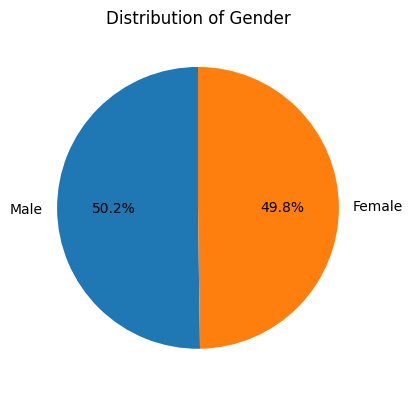

-----------------------------------------------


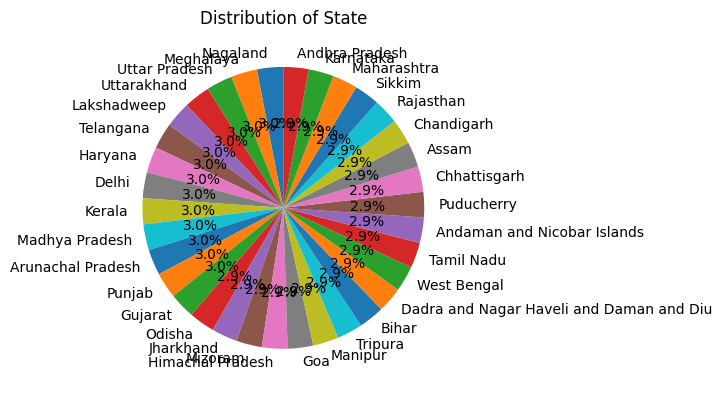

-----------------------------------------------


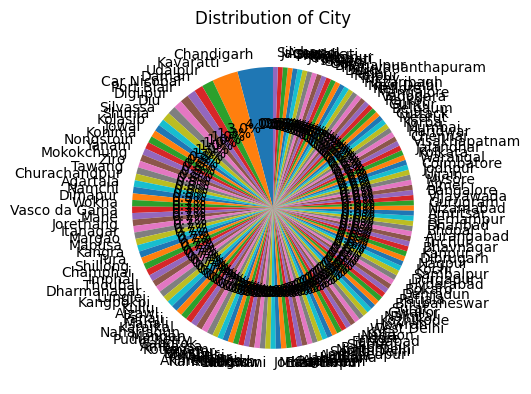

-----------------------------------------------


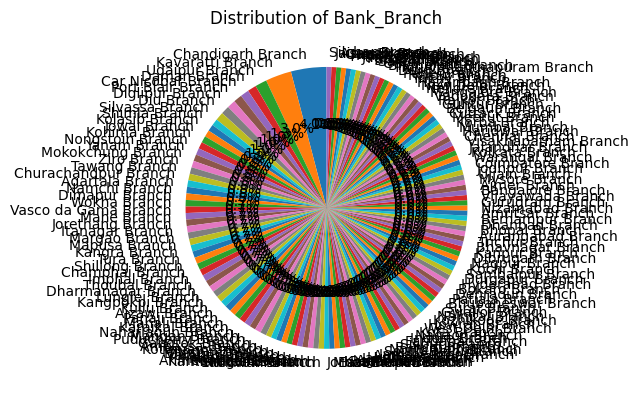

-----------------------------------------------


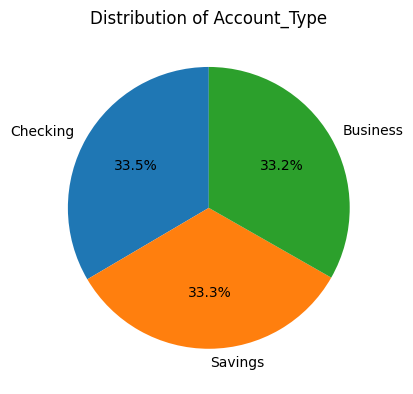

-----------------------------------------------


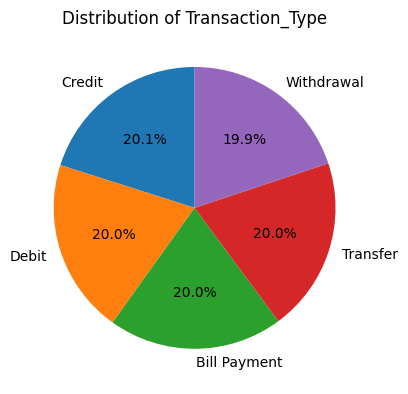

-----------------------------------------------


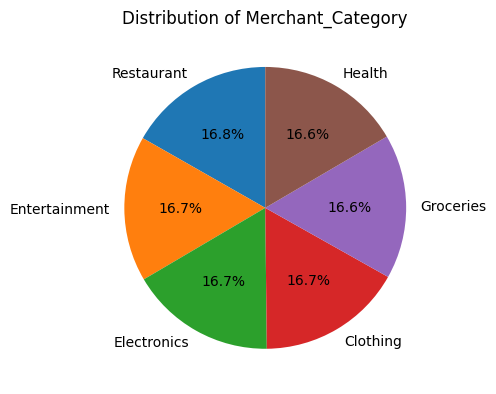

-----------------------------------------------


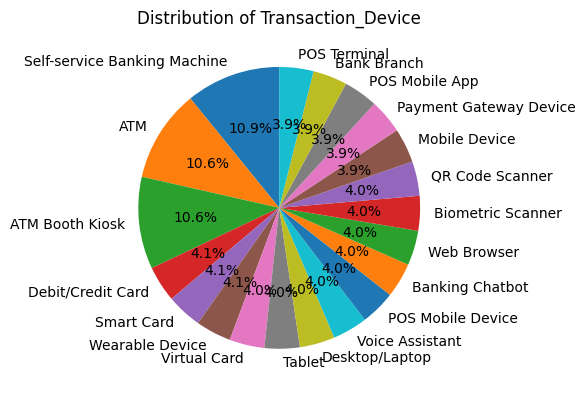

-----------------------------------------------


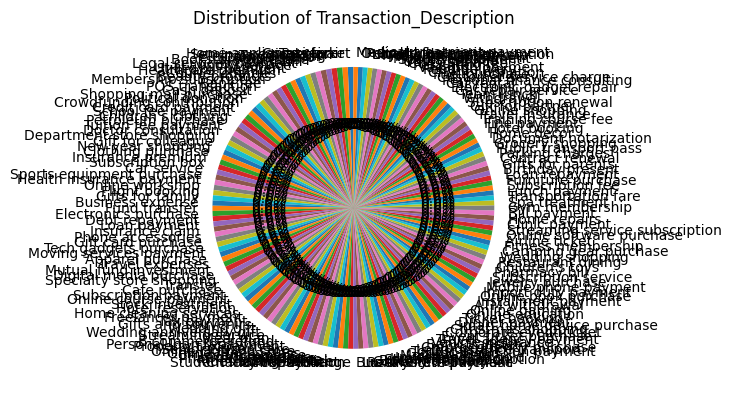

-----------------------------------------------


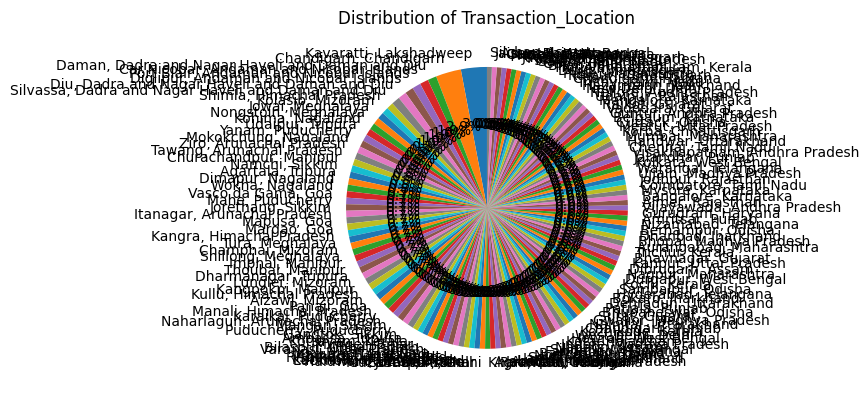

-----------------------------------------------


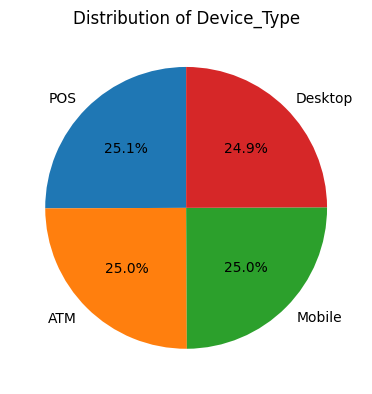

-----------------------------------------------


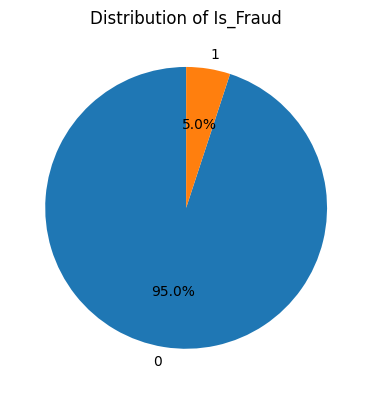

-----------------------------------------------


In [ ]:
cat_cols = ["Gender", "State", "City", "Bank_Branch", "Account_Type",
            "Transaction_Type", "Merchant_Category", "Transaction_Device","Transaction_Description",
            "Transaction_Location", "Device_Type", "Is_Fraud"]

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # Hide y-label for cleaner pie chart
    plt.show()
    print("-----------------------------------------------")

# **Univariate** **for** **numerical** **variables**

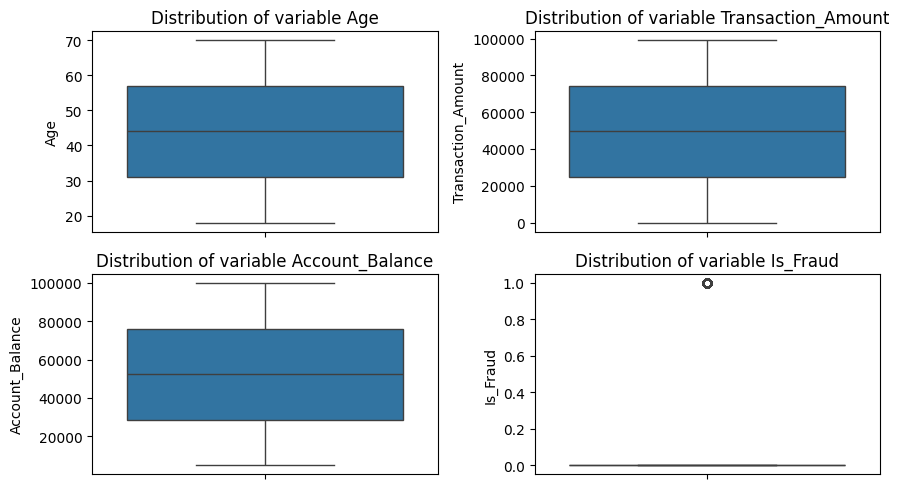

In [ ]:
plt.rcParams['figure.figsize'] = [9,5]
t=1
for i in df_num:
    plt.subplot(2,2,t)
    sns.boxplot(df[i])
    plt.title(f'Distribution of variable {i}')
    t+=1
plt.tight_layout()
plt.show()

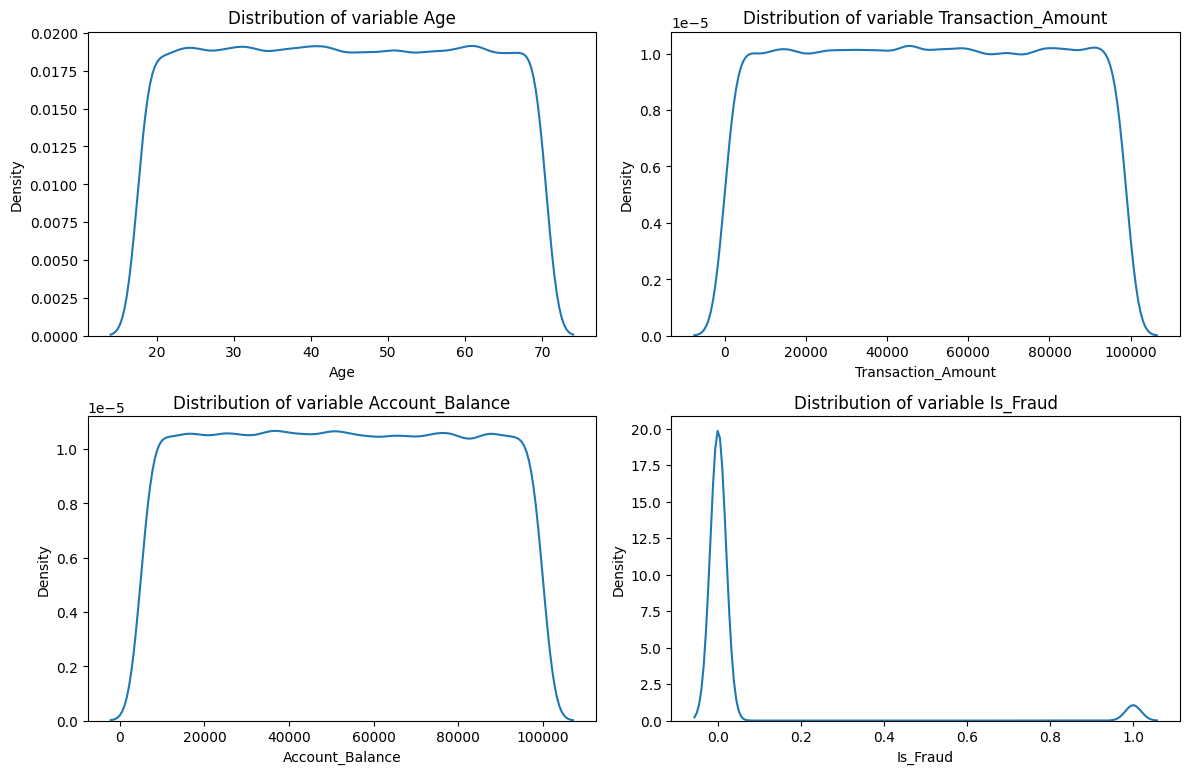

In [ ]:
plt.rcParams['figure.figsize'] = [12,8]
t=1
for i in df_num:
    plt.subplot(2,2,t)
    sns.kdeplot(df[i])
    plt.title(f'Distribution of variable {i}')
    t+=1
plt.tight_layout()
plt.show()

# **Bi-variate for categorical variables**

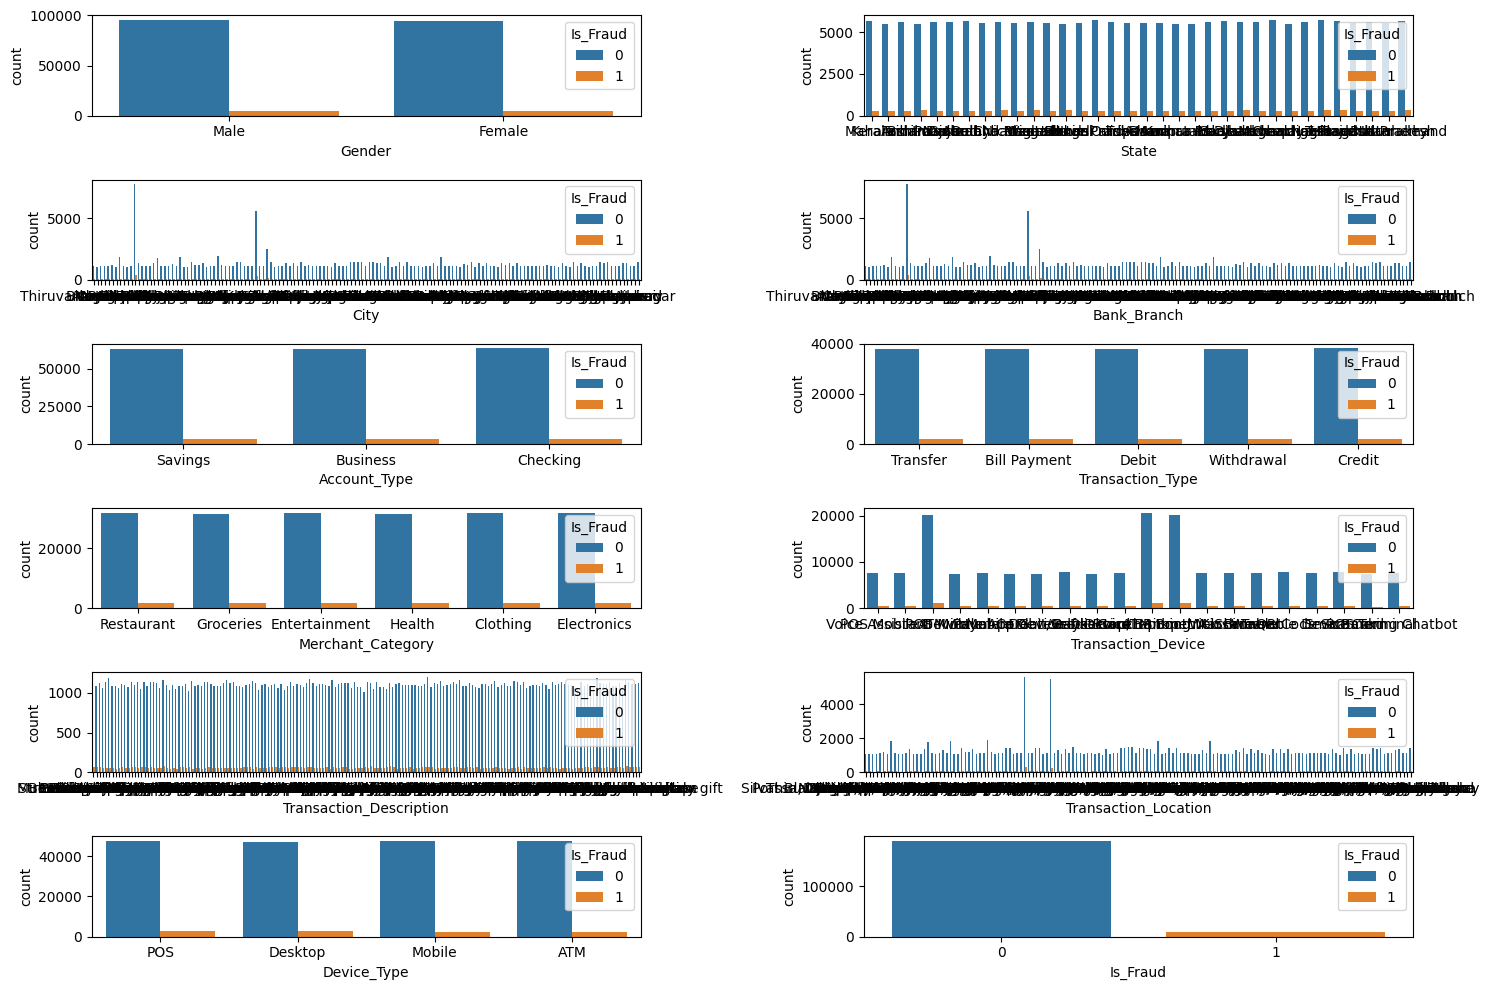

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
t=1
for i in cat_cols:
    if i not in ['Transaction_Date','Transaction_Time']:
        plt.subplot(6,2,t)
        sns.countplot(x=i, hue='Is_Fraud', data=df)
        t+=1
plt.tight_layout()
plt.show()

# **Bivariate for numerical variables**

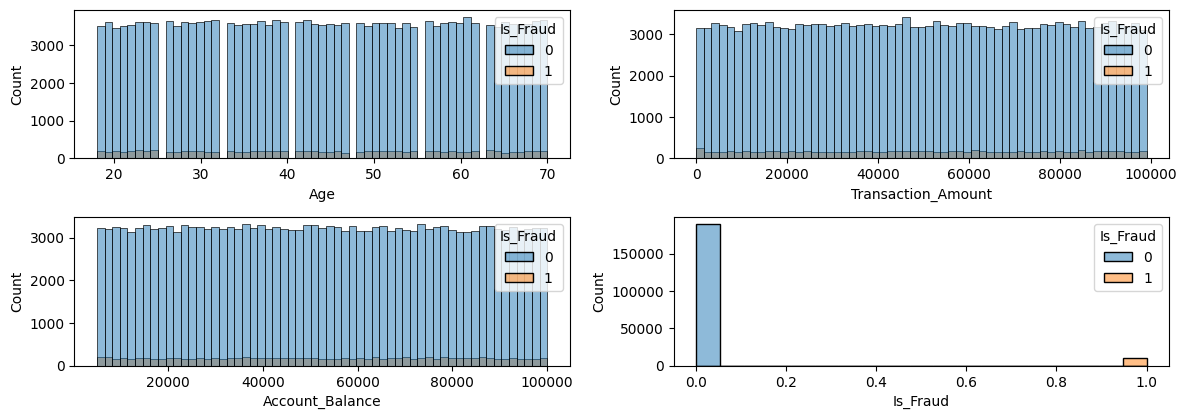

In [ ]:
plt.rcParams['figure.figsize'] = [12,8]
t=1
for i in df_num:
        plt.subplot(4,2,t)
        sns.histplot(x=i, hue='Is_Fraud', data=df)
        t+=1
plt.tight_layout()
plt.show()

# **Correlation between Numerical variables.**

In [ ]:
df_num.corr()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
Age,1.000000,-0.003087,0.000269,-0.001517
Transaction_Amount,-0.003087,1.000000,-0.001735,-0.002100
Account_Balance,0.000269,-0.001735,1.000000,0.000125
Is_Fraud,-0.001517,-0.002100,0.000125,1.000000


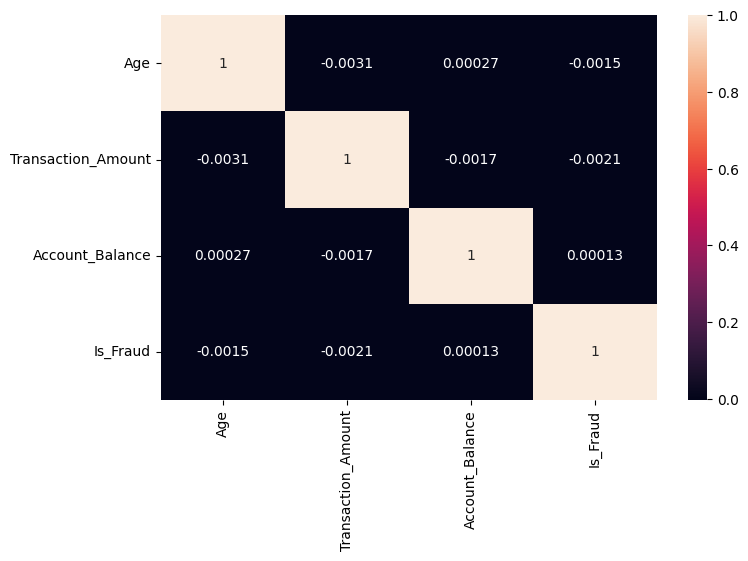

In [ ]:
plt.rcParams['figure.figsize'] = [8,5]
sns.heatmap(df_num.corr(), annot=True)
plt.show()

# **Feature Engineering**

In [ ]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')

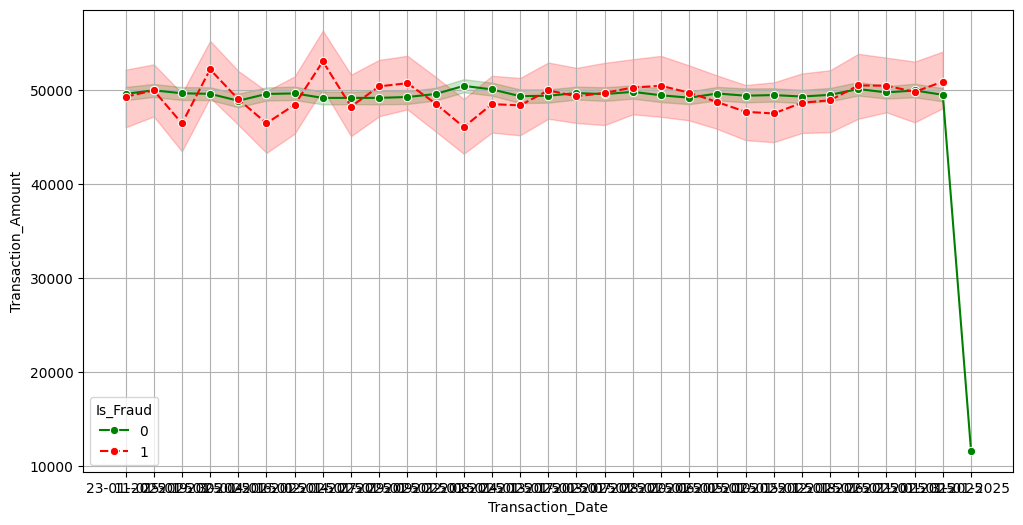

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Transaction_Date',
    y='Transaction_Amount',
    hue='Is_Fraud',
    style='Is_Fraud',
    palette={0: "green", 1: "red"},
    marker='o'
)
plt.grid(True)

Time based variables

In [ ]:
# Transaction_Date and Transaction_Time are strings , convert them
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.time

# Combine date and time for full datetime
df['Transaction_Datetime'] = pd.to_datetime(df['Transaction_Date'].astype(str) + ' ' + df['Transaction_Time'].astype(str))

# Extract hour and day of week
df['hour'] = df['Transaction_Datetime'].dt.hour
df['day_of_week'] = df['Transaction_Datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

# Night flag
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 or x >= 22 else 0)

# Weekend flag
df['weekend_flag'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

2. Frequency Feature: #Transactions per User/Day

In [ ]:
df['user_day_txn_count'] = df.groupby(['Customer_ID','Transaction_Date'])['Transaction_Amount'].transform('count')

3. Ratio Feature: Transaction_Amount / Account_Balance

In [ ]:
df['txn_to_balance_ratio'] = df.apply(
    lambda row: row['Transaction_Amount'] / row['Account_Balance'] if row['Account_Balance'] != 0 else 0,
    axis=1)

4. RFM model for transaction date and amount.

In [ ]:
latest_date = df['Transaction_Date'].max()

# RFM calculation
rfm = df.groupby('Customer_ID').agg({
    'Transaction_Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',                                   # Frequency
    'Transaction_Amount': 'sum'                                  # Monetary
}).reset_index()

rfm.columns = ['Customer_ID', 'recency', 'frequency', 'monetary']
df1=df.merge(rfm,on="Customer_ID")

In [ ]:
df1.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email', 'Transaction_Datetime',
       'hour', 'day_of_week', 'is_night', 'weekend_flag', 'user_day_txn_count',
       'txn_to_balance_ratio', 'recency', 'frequency', 'monetary'],
      dtype='object')

5. Getting transaction amount as per city.

In [ ]:
city_totals = df1.groupby('City')['Transaction_Amount'].sum().reset_index()
city_totals.columns = ['City', 'Transaction_Amount']
tier1_thresh = city_totals['Transaction_Amount'].quantile(0.90)
tier2_thresh = city_totals['Transaction_Amount'].quantile(0.50)

def assign_tier(amount):
    if amount >= tier1_thresh:
        return 'Tier 1'
    elif amount >= tier2_thresh:
        return 'Tier 2'
    else:
        return 'Tier 3'

city_totals['tier'] = city_totals['Transaction_Amount'].apply(assign_tier)
df1=df.merge(city_totals,on="City")

In [ ]:
df1.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount_x', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email', 'Transaction_Datetime',
       'hour', 'day_of_week', 'is_night', 'weekend_flag', 'user_day_txn_count',
       'txn_to_balance_ratio', 'Transaction_Amount_y', 'tier'],
      dtype='object')

6. Divided timings in 4 slots

In [ ]:
def assign_time_slot(hour):
    if 0 <= hour < 6:
        return 'Slot_1'
    elif 6 <= hour < 12:
        return 'Slot_2'
    elif 12 <= hour < 18:
        return 'Slot_3'
    else:
        return 'Slot_4'

df1['time_slot'] = df1['hour'].apply(assign_time_slot)

7. Extract first 2 Digits of contact Number

In [ ]:
# Extract the two digits after +91
df1['extracted_digits'] = [str(contact)[3:5] for contact in df1['Customer_Contact']]

print("extracted_digits")

df1['extracted_digits'].unique()

# sns.boxplot(data=df1,x='extracted_digits',y='Is_Fraud')

df1['extracted_digits'] = df1['extracted_digits'].astype(int)

df1.groupby('Is_Fraud')['extracted_digits'].count()

fraud_count = df1.groupby(['extracted_digits','Is_Fraud']).size().unstack(fill_value=0)
fraud_count

extracted_digits


Is_Fraud,0,1
extracted_digits,,
91,21257,1086
92,21062,1136
93,20957,1140
94,21101,1154
95,21152,1029
96,21148,1118
97,20929,1207
98,21149,1109
99,21157,1109


8. Extract names from email-ids and compared with customer names.

In [ ]:
# Extract everything up to the first 'X'
df1['Email_Prefix'] = df1['Customer_Email'].str.extract(r'^([^X]+)')

# Display the new column
print(df1[['Customer_Name', 'Email_Prefix']])

              Customer_Name Email_Prefix
0                Osha Tella         osha
1           Hredhaan Khosla     hredhaan
2            Ekani Nazareth        ekani
3       Yamini Ramachandran       yamini
4              Kritika Rege      kritika
...                     ...          ...
199995        Vedhika Magar      vedhika
199996            Aashi Pai        aashi
199997          Dayita Shan       dayita
199998          Unnati Vyas       unnati
199999           Gopal Rout        gopal

[200000 rows x 2 columns]


9.Splited Trasaction Description and comparing the counts of words with fraud.

In [ ]:
df1["TDSplit"]=df1["Transaction_Description"].str.split()
all_words = set(word for sublist in df1["TDSplit"] for word in sublist)
word_fraud_stats = []

for word in all_words:
    fraud_count = df1[df1["Is_Fraud"] == 1]["TDSplit"].apply(lambda x: word in x).sum()
    non_fraud_count = df1[df1["Is_Fraud"] == 0]["TDSplit"].apply(lambda x: word in x).sum()

    word_fraud_stats.append({
        "Word": word,
        "Fraud_Count": fraud_count,
        "Non_Fraud_Count": non_fraud_count
    })
word_fraud_df = pd.DataFrame(word_fraud_stats)
word_fraud_df = word_fraud_df.sort_values(by="Fraud_Count", ascending=False)
print(word_fraud_df)

         Word  Fraud_Count  Non_Fraud_Count
63    payment         1528            28723
122  purchase         1317            24408
32     Online          549            10948
91    service          510             9876
73        fee          503             9903
..        ...          ...              ...
170     lunch           46             1083
223     class           45             1120
197   fitness           45             1120
142     Lunch           43             1097
213      gear           42             1104

[230 rows x 3 columns]


# **Encoding for Categorical Variables**



In [ ]:
cat_df1 = df1.select_dtypes(include="object")
cat_df1.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Time',
       'Transaction_Type', 'Merchant_Category', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email', 'tier', 'time_slot',
       'Email_Prefix', 'TDSplit'],
      dtype='object')

In [ ]:
cat_Df1 = cat_df1.drop(["Customer_ID", "Customer_Name","Transaction_ID","Transaction_Location","Bank_Branch",
                    "Customer_Contact","Customer_Email","Email_Prefix","TDSplit","time_slot","Transaction_Time"], axis = 1)
cat_Df1.head(2)

,Gender,State,City,Account_Type,Transaction_Type,Merchant_Category,Transaction_Device,Device_Type,Transaction_Description,tier
0,Male,Kerala,Thiruvananthapuram,Savings,Transfer,Restaurant,Voice Assistant,POS,Bitcoin transaction,Tier 3
1,Female,Maharashtra,Nashik,Business,Bill Payment,Restaurant,POS Mobile Device,Desktop,Grocery delivery,Tier 3


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_Df1.columns:
    cat_Df1[i] = le.fit_transform(cat_Df1[i])

In [ ]:
cat_Df1.head(2)

,Gender,State,City,Account_Type,Transaction_Type,Merchant_Category,Transaction_Device,Device_Type,Transaction_Description,tier
0,1,15,127,2,3,5,17,3,9,2
1,0,18,100,0,0,5,9,1,65,2


# **Scaling for numerical variables**

In [ ]:
num_df1 = df1.select_dtypes(include ="number")

In [ ]:
num_df1.columns

Index(['Age', 'Transaction_Amount_x', 'Account_Balance', 'Is_Fraud', 'hour',
       'day_of_week', 'is_night', 'weekend_flag', 'user_day_txn_count',
       'txn_to_balance_ratio', 'Transaction_Amount_y', 'extracted_digits'],
      dtype='object')

In [ ]:
num_Df1 = num_df1.drop(["Is_Fraud","Transaction_Amount_x","user_day_txn_count"],axis = 1)
num_Df1.head(2)

,Age,Account_Balance,hour,day_of_week,is_night,weekend_flag,txn_to_balance_ratio,Transaction_Amount_y,extracted_digits
0,60,74557.27,16,3,0,0,0.434772,56279301.66,98
1,51,74622.66,17,5,0,1,0.584576,56534199.24,91


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(num_Df1), columns=num_Df1.columns)

In [ ]:
final = pd.concat([cat_Df1,num_scaled],axis = 1)
final.head(5)

,Gender,State,City,Account_Type,Transaction_Type,Merchant_Category,Transaction_Device,Device_Type,Transaction_Description,tier,Age,Account_Balance,hour,day_of_week,is_night,weekend_flag,txn_to_balance_ratio,Transaction_Amount_y,extracted_digits
0,1,15,127,2,3,5,17,3,9,2,1.045534,0.807290,0.651949,0.014148,-0.706966,-0.605040,-0.555856,-0.395936,1.161114
1,0,18,100,0,0,5,9,1,65,2,0.456865,0.809676,0.796519,1.045316,-0.706966,1.652783,-0.482268,-0.392643,-1.547976
2,1,4,13,2,0,3,0,1,102,2,-1.570771,0.524828,-1.227458,1.045316,1.414495,1.652783,-0.305808,-0.375751,0.774101
3,0,28,22,0,2,2,8,2,51,2,0.849311,0.209460,0.073670,1.560900,-0.706966,1.652783,-0.651211,-0.395561,0.000075
4,0,25,7,2,3,2,16,2,37,2,-0.066396,-1.325919,0.941088,0.014148,-0.706966,-0.605040,-0.210298,-0.382685,0.000075


# **Modelling**

In [ ]:
x = final
y = df1["Is_Fraud"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter = 1000)
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg ))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000


Confusion Matrix:
[[37955     0]
 [ 2045     0]]


Logistics Regession after using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter = 1000)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_log_reg1 = log_reg.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg1 ))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg1))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     37955
           1       0.05      0.34      0.09      2045

    accuracy                           0.64     40000
   macro avg       0.50      0.50      0.43     40000
weighted avg       0.90      0.64      0.74     40000


Confusion Matrix:
[[24991 12964]
 [ 1346   699]]


Random Forest model

In [ ]:
rm = RandomForestClassifier(class_weight='balanced', random_state=42)
rm.fit(X_train_smote,y_train_smote)

# Make predictions on the test set
y_pred_rm = rm.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rm ))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rm))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.05      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.50      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000


Confusion Matrix:
[[37894    61]
 [ 2042     3]]


XG_Boost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg_model = XGBClassifier(random_state=42)
xg_model.fit(X_train_smote, y_train_smote)

y_pred_xg = rm.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xg ))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xg))



Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.05      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.50      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000


Confusion Matrix:
[[37894    61]
 [ 2042     3]]


In [ ]:
final["Is_Fraud"] = df1["Is_Fraud"]
final.head(2)

,Gender,State,City,Account_Type,Transaction_Type,Merchant_Category,Transaction_Device,Device_Type,Transaction_Description,tier,Age,Account_Balance,hour,day_of_week,is_night,weekend_flag,txn_to_balance_ratio,Transaction_Amount_y,extracted_digits,Is_Fraud
0,1,15,127,2,3,5,17,3,9,2,1.045534,0.807290,0.651949,0.014148,-0.706966,-0.605040,-0.555856,-0.395936,1.161114,0
1,0,18,100,0,0,5,9,1,65,2,0.456865,0.809676,0.796519,1.045316,-0.706966,1.652783,-0.482268,-0.392643,-1.547976,0


In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier
)
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb

# ======= Make sure df1 is defined with 'Is_Fraud' and features =======
fraud_df = final[final['Is_Fraud'] == 1]
non_fraud_df = final[final['Is_Fraud'] == 0]

n_frauds = len(fraud_df)
n_non_frauds = len(non_fraud_df)
n_chunks = n_non_frauds // n_frauds

print(f"Creating {n_chunks} balanced batches...\n")

# ======= MODELS =======
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', solver='liblinear'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, class_weight='balanced'),
    ##'SVM (Linear)': LinearSVC(class_weight='balanced', max_iter=10000),
    'Ridge Classifier': RidgeClassifier()
}

model_reports = {model_name: [] for model_name in models}
conf_matrix_sum = {model_name: np.zeros((2, 2), dtype=int) for model_name in models}

# ======= BALANCED CHUNK LOOP =======
for i in range(n_chunks):
    non_fraud_sample = non_fraud_df.sample(n=n_frauds, random_state=i)
    balanced_df = pd.concat([fraud_df, non_fraud_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

    X = balanced_df.drop('Is_Fraud', axis=1)
    y = balanced_df['Is_Fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # # Feature scaling
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        try:
            model_clone = model.__class__(**model.get_params())
            model_clone.fit(X_train, y_train)

            y_pred = model_clone.predict(X_test)

            # ROC AUC
            try:
                if hasattr(model_clone, "predict_proba"):
                    y_prob = model_clone.predict_proba(x_test)[:, 1]
                elif hasattr(model_clone, "decision_function"):
                    y_prob = model_clone.decision_function(X_test)
                else:
                    y_prob = None

                auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
            except:
                auc = None

            # Classification report
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            report['roc_auc'] = auc
            model_reports[model_name].append(report)

            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            conf_matrix_sum[model_name] += cm

        except Exception as e:
            print(f"Model {model_name} failed on chunk {i}: {e}")

# ======= AVERAGE METRICS & CONFUSION MATRICES =======
print("\nAverage performance on fraud class (1) across all chunks:\n")
for model_name, reports in model_reports.items():
    try:
        avg_precision = np.mean([r['1']['precision'] for r in reports])
        avg_recall = np.mean([r['1']['recall'] for r in reports])
        avg_f1 = np.mean([r['1']['f1-score'] for r in reports])
        auc_scores = [r['roc_auc'] for r in reports if r['roc_auc'] is not None]
        avg_auc = np.mean(auc_scores) if auc_scores else None

        print(f"{model_name:20s} | Precision: {avg_precision:.3f} | Recall: {avg_recall:.3f} | F1-score: {avg_f1:.3f} | ROC AUC: {avg_auc:.3f}" if avg_auc else
              f"{model_name:20s} | Precision: {avg_precision:.3f} | Recall: {avg_recall:.3f} | F1-score: {avg_f1:.3f} | ROC AUC: N/A")

        # Print confusion matrix
        print(f"Confusion Matrix (summed across chunks):\n{conf_matrix_sum[model_name]}\n{'-'*80}")

    except Exception as e:
        print(f"{model_name:20s} | Failed to compute metrics: {e}")

Creating 18 balanced batches...


Average performance on fraud class (1) across all chunks:

Logistic Regression  | Precision: 0.508 | Recall: 0.510 | F1-score: 0.509 | ROC AUC: N/A
Confusion Matrix (summed across chunks):
[[26613 27189]
 [27052 28100]]
--------------------------------------------------------------------------------
Random Forest        | Precision: 0.504 | Recall: 0.445 | F1-score: 0.473 | ROC AUC: N/A
Confusion Matrix (summed across chunks):
[[29690 24112]
 [30609 24543]]
--------------------------------------------------------------------------------
Gradient Boosting    | Precision: 0.506 | Recall: 0.435 | F1-score: 0.468 | ROC AUC: N/A
Confusion Matrix (summed across chunks):
[[30318 23484]
 [31139 24013]]
--------------------------------------------------------------------------------
XGBoost              | Precision: 0.501 | Recall: 0.477 | F1-score: 0.489 | ROC AUC: N/A
Confusion Matrix (summed across chunks):
[[27570 26232]
 [28834 26318]]
--------------------

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_fscore_support
# Assume X and y are already defined. For demonstration, let's simulate some data.
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, weights=[0.7, 0.3],
                           random_state=42)

# --- Create balanced batches ---
def create_balanced_batches(X, y, n_batches=18, random_state=42):
    np.random.seed(random_state)
    idx_class0 = np.where(y == 0)[0]
    idx_class1 = np.where(y == 1)[0]

    np.random.shuffle(idx_class0)
    np.random.shuffle(idx_class1)

    batches = []
    for i in range(n_batches):
        batch0 = np.array_split(idx_class0, n_batches)[i]
        batch1 = np.array_split(idx_class1, n_batches)[i]
        batch = np.concatenate([batch0, batch1])
        np.random.shuffle(batch)
        batches.append(batch)
    return batches

# --- Evaluate model ---
def evaluate_model_on_batches(X, y, batches, model):
    total_cm = np.zeros((2,2), dtype=int)
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_roc_auc = 0
    total_accuracy = 0

    n_batches = len(batches)

    for idx in batches:
        X_batch = X[idx]
        y_batch = y[idx]

        model.fit(X_batch, y_batch)
        y_pred = model.predict(X_batch)
        y_prob = model.predict_proba(X_batch)[:,1]

        precision, recall, f1, _ = precision_recall_fscore_support(
        y_batch, y_pred, labels=[1], average='binary', zero_division=0)
        roc_auc = roc_auc_score(y_batch, y_prob)
        acc = accuracy_score(y_batch, y_pred)
        cm = confusion_matrix(y_batch, y_pred, labels=[0,1])

        total_cm += cm
        total_precision += precision
        total_recall += recall
        total_f1 += f1
        total_roc_auc += roc_auc
        total_accuracy += acc

    avg_precision = total_precision / n_batches
    avg_recall = total_recall / n_batches
    avg_f1 = total_f1 / n_batches
    avg_roc_auc = total_roc_auc / n_batches
    avg_accuracy = total_accuracy / n_batches

    return print("avg_accuracy",avg_accuracy,"avg_precision",avg_precision,"avg_recall",avg_recall,"avg_f1",avg_f1,"avg_roc_auc", avg_roc_auc,"total_cm",total_cm)

# Create balanced batches
batches = create_balanced_batches(X, y, n_batches=18)

# Define tuned base models
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=27, metric='euclidean',
                           n_neighbors=15, p=2, weights='uniform')
lr = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
qda = QuadraticDiscriminantAnalysis()

# Define fine-tuned VotingClassifier with weights (best from previous results or hypothetical tuning)
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('lr', lr), ('qda', qda)],
    voting='soft',
    weights=[1, 2, 1]
)

# Evaluate the model
voting_results = evaluate_model_on_batches(X, y, batches, voting_clf)
voting_results

avg_accuracy 0.9339516911539493 avg_precision 0.928855375097657 avg_recall 0.8467607399510384 avg_f1 0.885439190738053 avg_roc_auc 0.9780860491618627 total_cm [[13568   396]
 [  925  5111]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(cr)

Confusion Matrix:
[[2731   67]
 [ 152 1050]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2798
           1       0.94      0.87      0.91      1202

    accuracy                           0.95      4000
   macro avg       0.94      0.92      0.93      4000
weighted avg       0.95      0.95      0.94      4000



In [ ]:
from sklearn.inspection import permutation_importance

# Fit the voting classifier first
voting_clf.fit(X_train, y_train)

# Compute permutation importance on a validation set (e.g., X_test)
result = permutation_importance(voting_clf, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Sort features by importance
sorted_idx = importances.argsort()[::-1]

for i in sorted_idx[:10]:  # top 10 features
    print(f"{feature_names[i]}: {importances[i]:.4f}")

feature_6: 0.1104
feature_5: 0.0831
feature_10: 0.0747
feature_14: 0.0608
feature_7: 0.0589
feature_19: 0.0567
feature_9: 0.0548
feature_0: 0.0545
feature_3: 0.0535
feature_2: 0.0531


In [ ]:
final2 = df1.drop(["Customer_ID", "Customer_Name","Transaction_ID","Transaction_Location","Bank_Branch",
                    "Customer_Contact","Customer_Email","Email_Prefix","TDSplit","time_slot","Transaction_Time","Transaction_Datetime","Transaction_Amount_y","user_day_txn_count"], axis = 1)
final2.head(2)

,Gender,Age,State,City,Account_Type,Transaction_Date,Transaction_Amount_x,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,hour,day_of_week,is_night,weekend_flag,txn_to_balance_ratio,tier,extracted_digits
0,Male,60,Kerala,Thiruvananthapuram,Savings,2025-01-23,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0,Bitcoin transaction,16,3,0,0,0.434772,Tier 3,98
1,Female,51,Maharashtra,Nashik,Business,2025-01-11,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0,Grocery delivery,17,5,0,1,0.584576,Tier 3,91


In [ ]:
from sklearn.inspection import permutation_importance

# Assuming X_train and y_train are already defined from a previous split of the actual data (`final`)
# If not, ensure you split 'final' into X_train, y_train, X_test, y_test before this cell.

# # Compute permutation importance on the actual training set
# result = permutation_importance(voting_clf, X_train, y_train, n_repeats=10, random_state=42)

importances = result.importances_mean

# Use the column names from the actual training data (X_train)
feature_names = final2.drop(columns=['Is_Fraud']).columns

# Sort features by importance based on the importances calculated on X_train
sorted_idx = importances.argsort()[::-1]

# Print top 10 features with their real names and importance
print("Top 10 Features by Permutation Importance:")
for i in sorted_idx[:20]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Top 10 Features by Permutation Importance:
Transaction_Amount_x: 0.1104
Transaction_Date: 0.0831
Transaction_Device: 0.0747
day_of_week: 0.0608
Transaction_Type: 0.0589
extracted_digits: 0.0567
Account_Balance: 0.0548
Gender: 0.0545
City: 0.0535
State: 0.0531
txn_to_balance_ratio: 0.0525
is_night: 0.0504
Merchant_Category: 0.0490
Account_Type: 0.0450
tier: 0.0442
weekend_flag: 0.0433
Device_Type: 0.0383
Transaction_Description: 0.0379
Age: 0.0325
hour: 0.0295
